<a href="https://colab.research.google.com/github/Rogerod23/Rogelio/blob/main/fig10_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

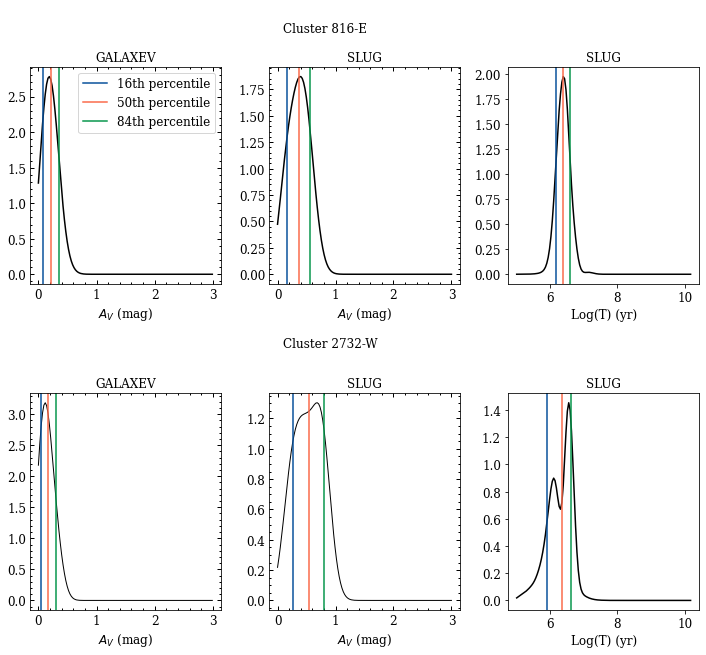

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
### THIS NOTEBOOK ONLY PLOTS CLUSTERS 2732 and 816.

#############################
#### LOAD DATA   ############
#############################
PDF = pd.read_csv("https://raw.githubusercontent.com/Rogerod23/Rogelio/main/PDF.csv")
percentiles = pd.read_csv("https://raw.githubusercontent.com/Rogerod23/Rogelio/main/percentiles_all.csv")

del PDF["Unnamed: 0"]
del percentiles["Unnamed: 0"]
cluster_id = ["2723", "816"]

PDF_columns = PDF.columns
percentiles_columns = percentiles.columns

#PDF COLUMN INFO TO SEE WHAT PLOT YOU WANT TO SEE
#print(percentiles_columns)
#print(PDF_columns)

#########################################################
# Colors 
#########################################################

alpha=1
blue=(7/255,80/255,155/255,alpha)
lblue=(106/255,175/255,210/255,alpha)
pistache=(190/255,250/255,215/255,alpha)
yellow=(248/255,250/255,3/255,alpha)
red=(251/255,105/255,73/255,alpha)
wine=(160/255,55/255,98/255,alpha)
dgreen=(5/255,149/255,74/255,alpha)
gray=(203/255,202/255,201/255,alpha)
black = (0,0,0,1)

mycolor=[blue,red,dgreen]

#########################################################
# Font parameters 
#########################################################
fontsize=12
font = {'family' : 'serif',
        'weight' : 'regular',
        'size'   : fontsize}
plt.rc('font', **font)

mycolor=[blue,red,dgreen]

mark = "None"
lw_ = 1.5
linestyle_ = "-"

#Figure size and subplots
fig, axes = plt.subplots(2,3,figsize=(12,10))
((ax1,ax2, ax3),(ax4,ax5, ax6)) = axes
plt.subplots_adjust(hspace=0.5)
plt.subplots_adjust(wspace=0.25)
code=['GALAXEV','SLUG']

for icluster in range(2):
    for icode in range(2):
        axes[icluster][icode].set_ylabel('')
        axes[icluster][icode].minorticks_on() #...add minor ticks to x and y axes
        axes[icluster][icode].tick_params(which='minor', length = 2, width = 1, #...format minor ticks
                                       direction = 'in', top = True, right = True)
        axes[icluster][icode].tick_params(which='major', length = 4, width = 1, #...format minor ticks  
                                          direction = 'in', top = True, right = True)
        if icode==0 and icluster == 0:
            axes[icluster][icode].annotate('Cluster 816-E', 
                                           xy = (0.4,0.95), xytext = (0.4,0.95), 
                                           xycoords='figure fraction', size = 12)
        if icode==0 and icluster == 1:
            axes[icluster][icode].annotate('Cluster 2732-W', 
                                           xy = (0.4,0.47), xytext = (0.4,0.47), 
                                           xycoords='figure fraction', size = 12)            
        axes[icluster][icode].set_xlabel('$A_V$ (mag)')
        axes[icluster][icode].set_title(code[icode],fontsize=12)


axes[0][2].set_title(code[1],fontsize=12)
axes[1][2].set_title(code[1],fontsize=12)

axes[0][2].set_xlabel('Log(T) (yr)')
axes[1][2].set_xlabel('Log(T) (yr)')

#Extinction plots
axes[0][0].plot(PDF.loc[:, PDF_columns[0]], PDF.loc[:, PDF_columns[5]], color = black, marker = mark, 
         markevery= 10, linestyle = linestyle_, lw=lw_)

axes[0][1].plot(PDF.loc[:, PDF_columns[148]], PDF.loc[:, PDF_columns[149]], color = black, marker = mark, 
         markevery= 10, linestyle = linestyle_, lw=lw_)

axes[0][0].axvline(percentiles.loc[0, percentiles_columns[6]], 
                   color =mycolor[0], linestyle = '-', linewidth = lw_,label='16th percentile')
axes[0][0].axvline(percentiles.loc[0, percentiles_columns[7]], color =mycolor[1],
                   linestyle =  '-', linewidth = lw_,label='50th percentile')
axes[0][0].axvline(percentiles.loc[0, percentiles_columns[8]], color =mycolor[2],
                   linestyle =  '-', linewidth = lw_,label='84th percentile')
axes[0][0].legend()

axes[0][1].axvline(percentiles.loc[0, percentiles_columns[222]], color =mycolor[0], linestyle = '-', linewidth = lw_)
axes[0][1].axvline(percentiles.loc[0, percentiles_columns[223]], color =mycolor[1], linestyle = '-', linewidth = lw_)
axes[0][1].axvline(percentiles.loc[0, percentiles_columns[224]], color =mycolor[2], linestyle =  '-', linewidth = lw_)

axes[1][0].plot(PDF.loc[:, PDF_columns[0]], PDF.loc[:, PDF_columns[1]], color = black, 
                marker = mark, markevery= 10, linestyle = linestyle_
                 , lw=1)
axes[1][1].plot(PDF.loc[:, PDF_columns[68]], PDF.loc[:, PDF_columns[69]], color = black, 
         marker = mark, markevery= 10, linestyle = linestyle_
                 , lw=1)

axes[1][0].axvline(percentiles.loc[0, percentiles_columns[0]], color =mycolor[0], linestyle = '-', linewidth = lw_)
axes[1][0].axvline(percentiles.loc[0, percentiles_columns[1]], color =mycolor[1], linestyle =  '-', linewidth = lw_)
axes[1][0].axvline(percentiles.loc[0, percentiles_columns[2]], color =mycolor[2], linestyle =  '-', linewidth = lw_)


axes[1][1].axvline(percentiles.loc[0, percentiles_columns[102]], color =mycolor[0], linestyle = '-', linewidth = lw_)
axes[1][1].axvline(percentiles.loc[0, percentiles_columns[103]], color = mycolor[1], linestyle = '-', linewidth = lw_)
axes[1][1].axvline(percentiles.loc[0, percentiles_columns[104]], color = mycolor[2], linestyle =  '-', linewidth = lw_)



### Age plots
axes[0][2].plot(PDF.loc[:, PDF_columns[150]], PDF.loc[:, PDF_columns[151]], color = black, marker = mark, 
         markevery= 10, linestyle = linestyle_, lw=lw_)

axes[0][2].axvline(percentiles.loc[0, percentiles_columns[225]], color =mycolor[0], linestyle = '-', linewidth = lw_)
axes[0][2].axvline(percentiles.loc[0, percentiles_columns[226]], color = mycolor[1], linestyle = '-', linewidth = lw_)
axes[0][2].axvline(percentiles.loc[0, percentiles_columns[227]], color = mycolor[2], linestyle =  '-', linewidth = lw_)




axes[1][2].plot(PDF.loc[:, PDF_columns[70]], PDF.loc[:, PDF_columns[71]], color = black, marker = mark, 
         markevery= 10, linestyle = linestyle_, lw=lw_)

axes[1][2].axvline(percentiles.loc[0, percentiles_columns[105]], color =mycolor[0], linestyle = '-', linewidth = lw_)
axes[1][2].axvline(percentiles.loc[0, percentiles_columns[106]], color = mycolor[1], linestyle = '-', linewidth = lw_)
axes[1][2].axvline(percentiles.loc[0, percentiles_columns[107]], color = mycolor[2], linestyle =  '-', linewidth = lw_)


plt.savefig("fig10_av_pdf.png", bbox_inches = 'tight',dpi=100)
plt.show()


In [7]:
index_816 = np.where(PDF_columns.str.contains("816") == True)
print(PDF_columns[index_816])
print(index_816)

Index(['AVt_cb2018_z014_u3_ID816', 'AVpdf_cb2018_z014_u3_ID816',
       'logt_cb2018_z014_u3_ID816', 'tpdf_cb2018_z014_u3_ID816',
       'AVt_modp020_chabrier_MW_phi0.50_ID816',
       'AVpdf_modp020_chabrier_MW_phi0.50_ID816',
       'logt_modp020_chabrier_MW_phi0.50_ID816',
       'tpdf_modp020_chabrier_MW_phi0.50_ID816'],
      dtype='object')
(array([144, 145, 146, 147, 148, 149, 150, 151]),)


In [9]:
index_816 = np.where(percentiles_columns.str.contains("816") == True)
print(percentiles_columns[index_816])
print(index_816)

Index(['AV_16th_cb2018_z014_u3_816', 'AV_50th_cb2018_z014_u3_816',
       'AV_84th_cb2018_z014_u3_816', 't_16th_cb2018_z014_u3_816',
       't_50th_cb2018_z014_u3_816', 't_84th_cb2018_z014_u3_816',
       'AV_16th_modp020_chabrier_MW_phi0.50_816',
       'AV_50th_modp020_chabrier_MW_phi0.50_816',
       'AV_84th_modp020_chabrier_MW_phi0.50_816',
       't_16th_modp020_chabrier_MW_phi0.50_816',
       't_50th_modp020_chabrier_MW_phi0.50_816',
       't_84th_modp020_chabrier_MW_phi0.50_816'],
      dtype='object')
(array([216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227]),)


In [12]:
index_2732 = np.where(PDF_columns.str.contains("2732") == True)
print(PDF_columns[index_2732])
print(index_2732)

Index(['AVt_cb2018_z014_u3_ID2732', 'AVpdf_cb2018_z014_u3_ID2732',
       'logt_cb2018_z014_u3_ID2732', 'tpdf_cb2018_z014_u3_ID2732',
       'AVt_modp020_chabrier_MW_phi0.50_ID2732',
       'AVpdf_modp020_chabrier_MW_phi0.50_ID2732',
       'logt_modp020_chabrier_MW_phi0.50_ID2732',
       'tpdf_modp020_chabrier_MW_phi0.50_ID2732'],
      dtype='object')
(array([64, 65, 66, 67, 68, 69, 70, 71]),)


In [14]:
index_2732 = np.where(percentiles_columns.str.contains("2732") == True)
print(percentiles_columns[index_2732])
print(index_2732)

Index(['AV_16th_cb2018_z014_u3_2732', 'AV_50th_cb2018_z014_u3_2732',
       'AV_84th_cb2018_z014_u3_2732', 't_16th_cb2018_z014_u3_2732',
       't_50th_cb2018_z014_u3_2732', 't_84th_cb2018_z014_u3_2732',
       'AV_16th_modp020_chabrier_MW_phi0.50_2732',
       'AV_50th_modp020_chabrier_MW_phi0.50_2732',
       'AV_84th_modp020_chabrier_MW_phi0.50_2732',
       't_16th_modp020_chabrier_MW_phi0.50_2732',
       't_50th_modp020_chabrier_MW_phi0.50_2732',
       't_84th_modp020_chabrier_MW_phi0.50_2732'],
      dtype='object')
(array([ 96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107]),)
